# Lab04 - Binary Image Processing
### CDS6334 Visual Information Processing


In this lab, we take a look at image thresholding, how binary images can be processed to extract information valuable for further interpretation, and the concept of connected components to understand how segmented regions can be labeled and counted.

First, load the necessary libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Thresholding

**Simple thresholding** applies the same threshold value for every pixel to produce a *binary image*. If the pixel value is large than the threshold, it is set to 0, otherwise it is set to a given maximum value. Thresholding is applied using the function [`cv2.threshold()`](https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#gae8a4a). The first argument is a **grayscale input image**. The second argument is the **threshold value** which is used to classify the pixel values into *background* (0) and *foreground* (max value). The third argument is the **maximum value** which is assigned to pixel values exceeding the threshold. OpenCV provides different **types of thresholding** which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type `cv2.THRESH_BINARY`. Other simple thresholding types can be found here: [`cv2.ThresholdTypes`](https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576).

The method returns two outputs. The first is the **threshold value** that was used and the second output is the **thresholded image**.<br>
Try it out with an image and change the threshold parameter to observe different outcomes:

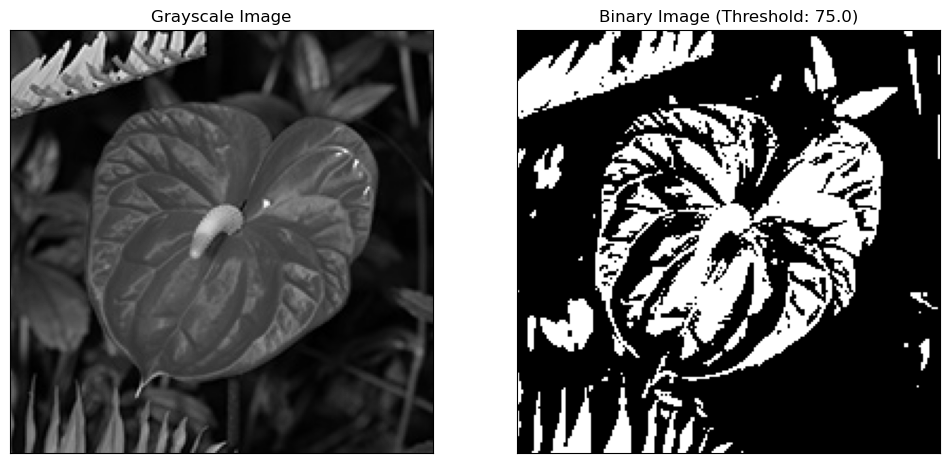

In [2]:
img = cv2.imread('redflower.jpg',0)
ret,th1 = cv2.threshold(img,75,255,cv2.THRESH_BINARY)

plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title('Grayscale Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(th1,cmap='gray')
plt.title('Binary Image (Threshold: '+str(ret)+')')
plt.xticks([]),plt.yticks([])
plt.show()

It is a difficult task to determine the best threshold value to binarize an image with one global value due to challenging environments such as different lighting conditions in different areas. Therefore, **Adaptive Thresholding** is preferred in most cases. The algorithm determines the threshold for a pixel based on a small region around it. It is then able to get different thresholds for different regions of the same image which gives better results for images with varying illumination.

The method [`cv2.adaptiveThreshold`](https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3) performs this by taking the following input parameters: the **maximum value** which is assigned to the output, the **adaptive thresholding algorithm** to use, the **thresholding type**, the **block size** of a pixel neighborhood that is used to calculate a threshold value, and a **constant** subtracted from the mean or weighted mean

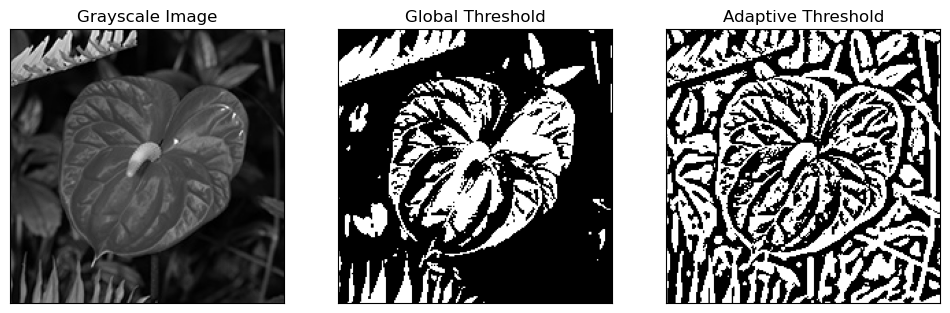

In [3]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img,cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(th1,cmap='gray')
plt.title('Global Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(th2,cmap='gray')
plt.title('Adaptive Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

## Morphological Operations

Morphological transformations are some simple operations that seek to alter or "morph" the image shape. They are typically performed on binary images. It requires two inputs, one is our original image, second one is called *structuring element* or kernel which decides the nature of operation. Two basic morphological operators are *Erosion* and *Dilation*. From these two basic ones, other variant forms like Opening, Closing, etc are possible.

The whole idea of **Erosion** is to "erode" away the boundary pixels of a foreground object. (A foreground object is usually an object comprising of white pixels, while the background are black pixels. This is the normal convention used.) In simple terms, this is how it works: A pixel in the original image will be considered 1 only if all the pixels under the coverage of kernel is 1, otherwise it is eroded (made to zero).

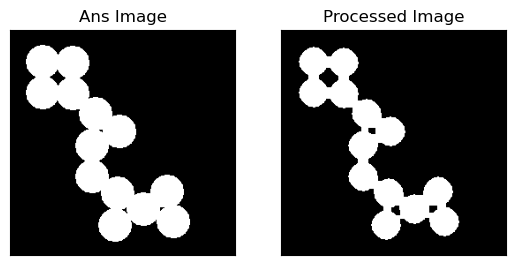

In [15]:
circles = cv2.imread('circles.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(circles,kernel,iterations = 1)

plt.subplot(121), plt.imshow(circles, cmap='gray');
plt.subplot(122), plt.imshow(erosion, cmap='gray');
plt.show()

It is possible to keep eroding away multiple times...

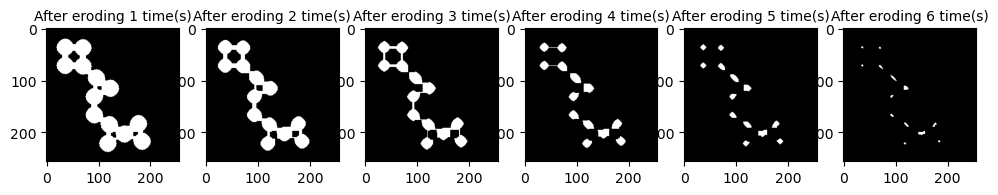

In [5]:
plt.figure(figsize=(12,2))
for i in range(6):
    erosion = cv2.erode(circles,kernel,iterations = i+1)
    plt.subplot(1,6,i+1), plt.imshow(erosion, cmap='gray'); plt.title('After eroding %d time(s)'%(i+1), fontsize=10)

plt.show()

**Dilation** is just the opposite of erosion. Here, all pixels under the kernel coverage are 1 if the current pixel element is 1. This increases the white region in the image or the size of foreground object. 

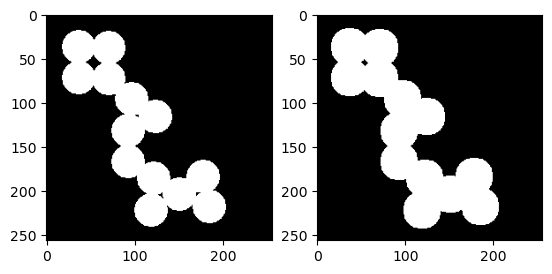

In [6]:
dilation = cv2.dilate(circles,kernel,iterations = 1)

plt.subplot(121), plt.imshow(circles, cmap='gray');
plt.subplot(122), plt.imshow(dilation, cmap='gray');
plt.show()

Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since the noise has been eroded away, it will not come back, but the subsequent dilation keeps the original object area intact. This process is called **Opening**. The **Closing** operation performs dilation first, followed by erosion. This fills up holes in foreground object regions (through dilation), but maintains the original object area (by eroding back). In both these operations, the structuring element used in their sub-tasks (erosion, dilation) is the same.

**Q1**: Perform *opening* and *closing* operations on the circle image.

(**Hint**: Check out [`cv2.morphologyEx()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) to find out how these operations can be done is just a single function call.)

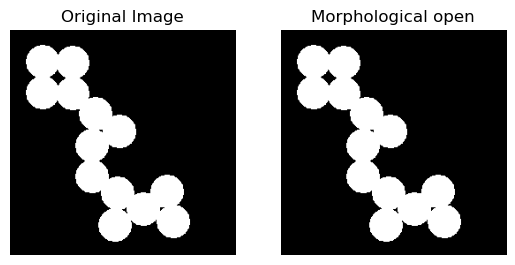

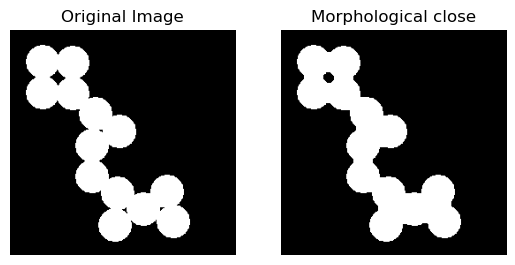

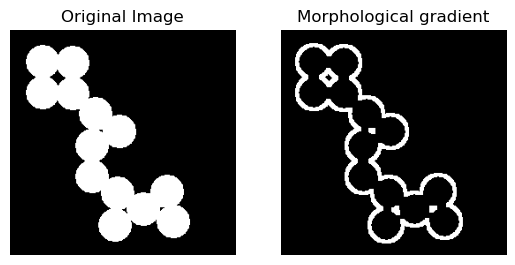

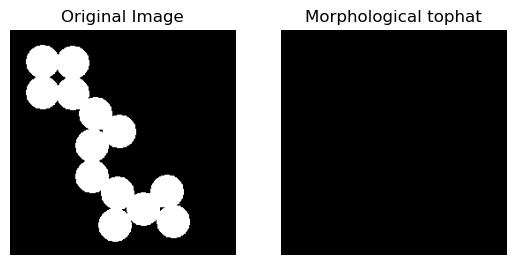

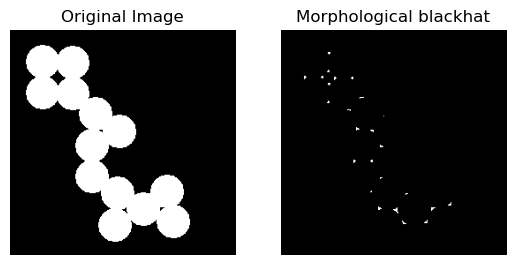

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
# Enter your code here
kernel = np.ones((5,5),np.uint8)

morph_map ={
    'open':cv2.MORPH_OPEN,
    'close':cv2.MORPH_CLOSE,
    'gradient':cv2.MORPH_GRADIENT,
    'tophat':cv2.MORPH_TOPHAT,
    'blackhat':cv2.MORPH_BLACKHAT,
    'dilation':cv2.MORPH_DILATE ,
    'erosion':cv2.MORPH_ERODE
}

def multiple_MORPH(img, kernel, iterations,option):
    morph_type = morph_map.get(option)
    exp = cv2.morphologyEx(img, morph_type, kernel, iterations=iterations)
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(exp, cmap='gray')
    plt.title(f'Morphological {option}'), plt.axis('off')
    plt.show()
    return exp

multiple_MORPH(circles, kernel, 1, 'open')
multiple_MORPH(circles, kernel, 1, 'close')
multiple_MORPH(circles, kernel, 1, 'gradient')
multiple_MORPH(circles, kernel, 1, 'tophat')
multiple_MORPH(circles, kernel, 1, 'blackhat')


**Q2**: Try different structuring elements, such as the cross-shape structuring element: $$\begin{bmatrix} 0 & 1 & 0 \\ 1 & 1 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$
, or rectangular shaped ones $$\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1  \end{bmatrix}$$
In both these cases, we assume the reference pixel to be at the center of the structuring element.

(**Hint**: For this purpose, OpenCV has a function, [`cv2.getStructuringElement()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) which you can just specify the shape (cross, rectangle, ellipse) and size of the kernel, you will get the desired kernel created!)

[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 0]]


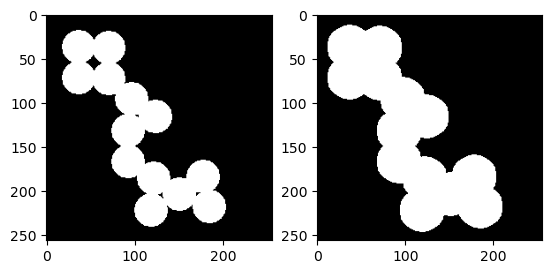

In [8]:
# Enter your code here
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)))
print(cv2.getStructuringElement(cv2.MORPH_RECT,(3,5)))
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,5)))


kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation2 = cv2.dilate(circles,kernel2,iterations = 3)

plt.subplot(121), plt.imshow(circles, cmap='gray')
plt.subplot(122), plt.imshow(dilation2, cmap='gray')
plt.show()

## Labeling Connected Components

After thresholding operation, a classic image processing task is the identification and labeling of *connected components*. Connected components are foreground regions (usually white by convention) comprising of pixels that are connected. The "connectedness" of pixels defines how pixels are connected to one another, either by *4-connectivity* or *8-connectivity*: 4-connectivity considers the north, south, east and west lying pixels as connected neighbors, while 8-connectivity considers all 8 neighboring pixels (including the diagonally lying neighbors). 

Let's attempt to label the foreground objects in this picture:<br>
![](rice_binary.png)

In [9]:
riceb = cv2.imread('rice_binary.png',  0)

# You need to choose 4 or 8 for connectivity type
connectivity = 4 

102


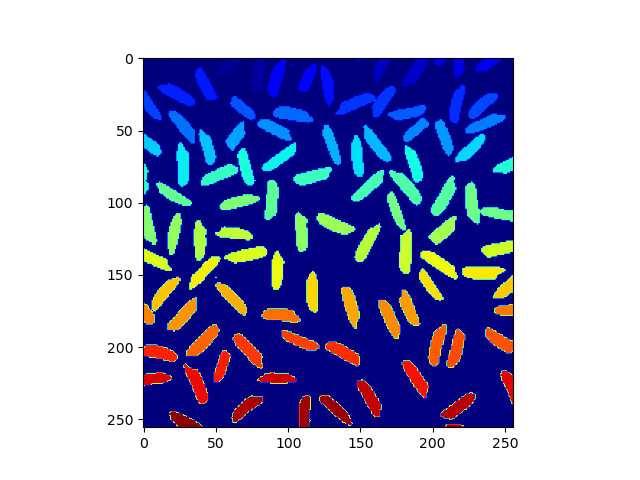

In [10]:
# perform labeling of connected components (white objects) in the rice binary image
numLabels, output_labels = cv2.connectedComponents(riceb, connectivity, cv2.CV_32S)
print(numLabels)

%matplotlib widget
plt.imshow(output_labels, cmap='jet');
plt.show()

#1 pixel have 8 neighboorholds

While there are N number of connected components, each connected component is given a label from 1...N. '0' still represents the background. Having enabled the interactive figure mode, you can mouseover the pixels to see the labels that have been assigned to each connected component.

Next, we want to improve our visualization by labeling each connected component with its corresponding label number. Perhaps a good place to put the labels is at the middle of the object. So, we need to get the centroid of each object. Fortunately, we have another function that is quite similar to the previous one -- [`cv2.connectedComponentsWithStats()`](http://docs.opencv.org/3.1.0/d3/dc0/group__imgproc__shape.html#gae57b028a2b2ca327227c2399a9d53241).

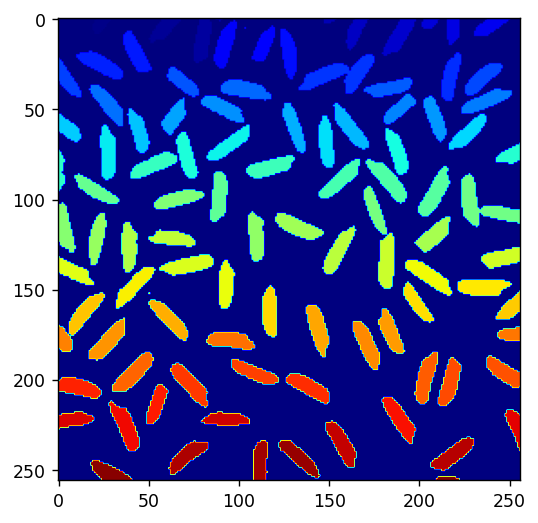

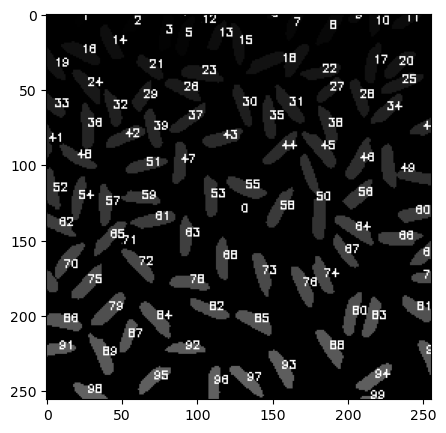

In [11]:
# turn interactive mode off again
%matplotlib inline

# connectedComponentsWithStats is quite similar, but nice thing is, it comes with some statistics 
# and centroid locations for the labeled regions
numLabels, output_labels, stats, centroids = cv2.connectedComponentsWithStats(riceb, connectivity, cv2.CV_32S)

# round up the centroid float values and cast to uint8
centroid_8u = np.uint8(np.round(centroids))

font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
plt.figure(figsize=(5,5))
for c in range(centroids.shape[0]):
    cv2.putText(output_labels,'%d'%(c),tuple(centroid_8u[c,:]), font, 0.25,(255,255,255),1)
    plt.imshow(output_labels, cmap='gray');

plt.show()

Check out the other stats that were extracted from the connected components.

## Exercises

**Q1**. Using a combination of morphological operations, figure out how we can extract boundaries (or something like the perimeter) from a foreground object in a binary image. Try it on the image `aircraft_binary.png` and obtain the outcome shown in `aircraft_binary_gt.png`. Do a simple subtraction between your output with the ground truth to verify your answer. (Correct answer should produce a matrix of 0's):<br>
<br>
<table><tr>
<td> <img src="aircraft_binary.png" width="300" height="300" style="margin-top:-1em"/></td>
<td> <img src="aircraft_binary_gt.png" width="300" height="300" style="margin-top:-1em" /></td> 
</tr></table>

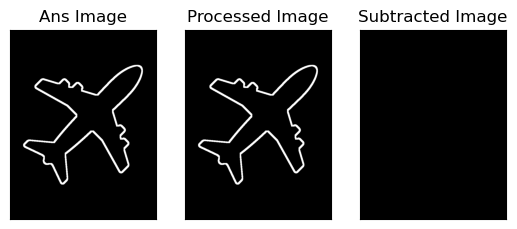

0


In [16]:
# Enter your code here
img = cv2.imread('aircraft_binary.png',0)
ans = cv2.imread('aircraft_binary_gt.png',0)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,15,1)

sub = ans - th2

plt.subplot(131), plt.imshow(ans,cmap='gray')
plt.title('Ans Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(th2,cmap='gray')
plt.title('Processed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sub,cmap='gray')
plt.title('Subtracted Image'), plt.xticks([]), plt.yticks([])
plt.show()


def calculateDiff (ans_img,process_img):
    ans = sum(sum(process_img - ans_img))
    print(ans)

calculateDiff(ans, th2)

**Q2** Given the background of a road, `bg.png` and an image with cars on the road, `cars.png` as shown below, perform vehicle counting. There should be 7 cars and 1 background as shown in the `cars_gt.png`.
<table><tr>
<td> <img src="bg.png" width="300"> </td>
<td> <img src="cars.png" width="300" /></td>
<td> <img src="cars_gt.png" width="300" /></td> 
</tr></table>

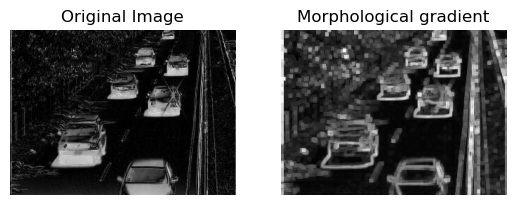

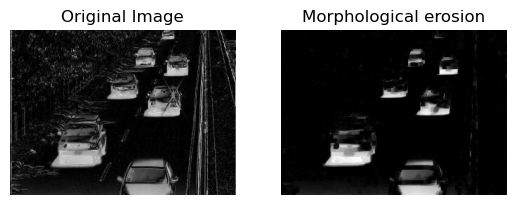

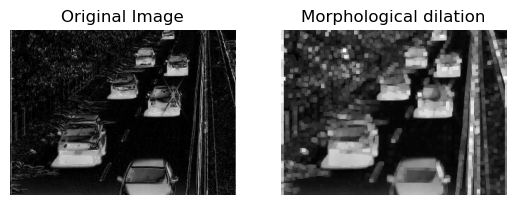

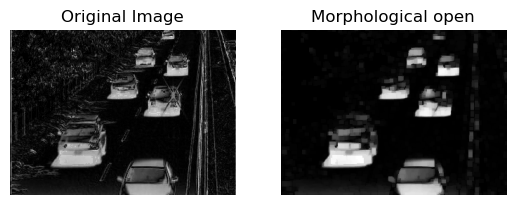

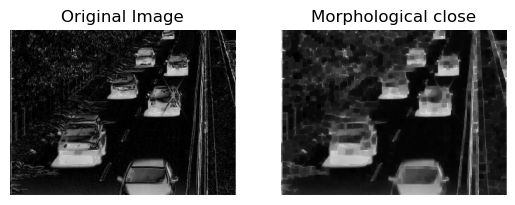

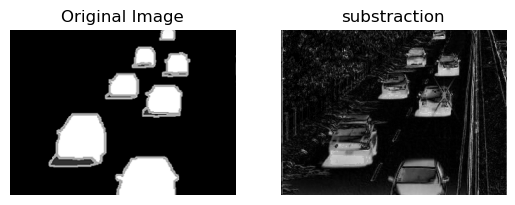

In [ ]:
# Enter your code here

road = cv2.imread('bg.png' ,0)
cars = cv2.imread('cars.png',0)
ans = cv2.imread('cars_gt.png')

foreground = cv2.absdiff(road, cars)

exp = multiple_MORPH(foreground, kernel, 1, 'gradient')
exp = multiple_MORPH(foreground, kernel, 1, 'erosion')
exp = multiple_MORPH(foreground, kernel, 1, 'dilation')
exp = multiple_MORPH(foreground, kernel, 1, 'open')
exp = multiple_MORPH(foreground, kernel, 1, 'close')


plt.subplot(121), plt.imshow(ans, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(foreground, cmap='gray')
plt.title(f'substraction'), plt.axis('off')
plt.show()